In [48]:
import numpy as numpy
import pandas as pd

In [49]:
salary = pd.read_csv('./data/Salary_Data.csv')
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [50]:
for col in salary.columns:
    if salary[col].dtypes == 'float64':
        salary[col] = salary[col].fillna(salary[col].mean())
    else :
        salary[col].dropna(inplace=True)
salary.dropna(inplace=True)
salary.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [51]:
X = salary.drop('Salary',axis=1)
Y = salary['Salary']

# Cleaning Data

In [52]:
salary.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [54]:
cat_impute = SimpleImputer(strategy="constant",fill_value="missing")
num_impute =SimpleImputer(strategy="mean")

cat_features = ['Gender','Education Level','Job Title']
num_features = ['Age','Years of Experience']

In [10]:
# trans = ColumnTransformer([
#     ('cat_impute',cat_impute,cat_features),
#     ('num_impute',num_impute,num_features)
# ])

# new_X = trans.fit_transform(X)
# df = pd.DataFrame(new_X)
# df

In [55]:
Y.dropna(inplace=True)
Y.isna().sum()

0

# Converting non-numeric to numeric features

In [56]:
from sklearn.preprocessing import OneHotEncoder


In [57]:
one = OneHotEncoder()
t = ColumnTransformer([
    ('one',one,cat_features)
],remainder="passthrough")

encode_x = t.fit_transform(X)
# df.DataFrame(encode_x)

In [58]:
pd.DataFrame(encode_x.toarray())

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,5.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,7.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,20.0
6697,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,3.0
6698,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,4.0
6699,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,14.0


In [68]:
from sklearn.model_selection import train_test_split
numpy.random.seed(78)
X_train,X_test,Y_train,Y_test = train_test_split(encode_x,Y,test_size=0.3) 


In [69]:
from sklearn.linear_model import Ridge
model = Ridge()

In [70]:
model.fit(X_train,Y_train);

In [71]:
model.score(X_test,Y_test) # coefficient of determination

0.8802410497464476

<b>Perfect Realtionship between the X features and Y values</b> as Coefficient of Determination is between <b>0.8 <r < 1 <b>

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [73]:
Y_predict = model.predict(X_test)
Y_predict

array([236720.41466394,  97092.19581505,  26444.14912264, ...,
       138562.9556034 , 143587.08651443, 111543.11472103])

In [74]:
Y_test

19      180000.0
4264     95000.0
4729     30000.0
5786     60000.0
3821     65000.0
          ...   
4397    228000.0
4460    119000.0
1022    150000.0
2356    140000.0
3079    100867.0
Name: Salary, Length: 2011, dtype: float64

In [76]:
print(f"MAE : {mean_absolute_error(Y_test,Y_predict)},MSE : {mean_squared_error(Y_test,Y_predict)},Score = {model.score(X_test,Y_test)}")
mod0 = {"MAE" : 13273.67,"MSE": 331142734.16,"Score" : 0.880}

MAE : 13273.671614077037,MSE : 331142734.16920614,Score = 0.8802410497464476


# Tuning the model by hyperparameters

In [33]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [35]:
grid = {"n_estimators":[10,100,200,500],
        "max_depth":[None,5,10,20,30],
        "max_features":[1.0,"sqrt",None],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]
}

model1 = RandomForestRegressor()
rf_model = RandomizedSearchCV(estimator=model1,param_distributions=grid,cv=5,n_iter=15,verbose=2)
rf_model.fit(X_train,Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': [1.0, 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500]},
                   verbose=2)

In [38]:
rf_model.best_params_,rf_model.best_score_

({'n_estimators': 200,
  'min_samples_split': 4,
  'min_samples_leaf': 1,
  'max_features': None,
  'max_depth': None},
 0.9748232584615366)

In [45]:
rf_pred = rf_model.predict(X_test)
rf_pred
print(f"MAE : {mean_absolute_error(Y_test,rf_pred)},MSE : {mean_squared_error(Y_test,rf_pred)},Score = {rf_model.best_score_}")
mod1 = {"MAE" : 2765.31,"MSE": 41996986.22,"Score" : 0.974}

MAE : 2765.319827926283,MSE : 43445809.280859746,Score = 0.9748232584615366


**The model has improved as its coefficient of determination has increased  and MAE and MSe has reduced which is indeed good**

In [40]:
#trying to fine tune it even further
grid2 = {"n_estimators":[150,200,250],
        "max_depth":[None],
        "max_features":[None],
        "min_samples_split":[3,4,5],
        "min_samples_leaf":[1]
}

model2 = RandomForestRegressor()
gs_model = GridSearchCV(estimator=model2,param_grid=grid2,cv=5,verbose=2)
gs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   6.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   6.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   6.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   7.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   7.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   9.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   9.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'max_features': [None],
                         'min_samples_leaf': [1],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [150, 200, 250]},
             verbose=2)

In [42]:
gs_model.best_params_,gs_model.best_score_

({'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 250},
 0.9751699978822896)

In [44]:
gs_pred = gs_model.predict(X_test)
gs_pred
print(f"MAE : {mean_absolute_error(Y_test,gs_pred)},MSE : {mean_squared_error(Y_test,gs_pred)},Score = {gs_model.best_score_}")
mod2 = {"MAE" : 2711.23,"MSE": 41996986.22,"Score" : 0.975}

MAE : 2711.2364671398973,MSE : 41996986.22662012,Score = 0.9751699978822896


# Plotting scatterplot for visual analysis

In [22]:
import matplotlib.pyplot as plt

C:\Users\vedant\AppData\Local\Temp\ipykernel_5196\1515433763.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


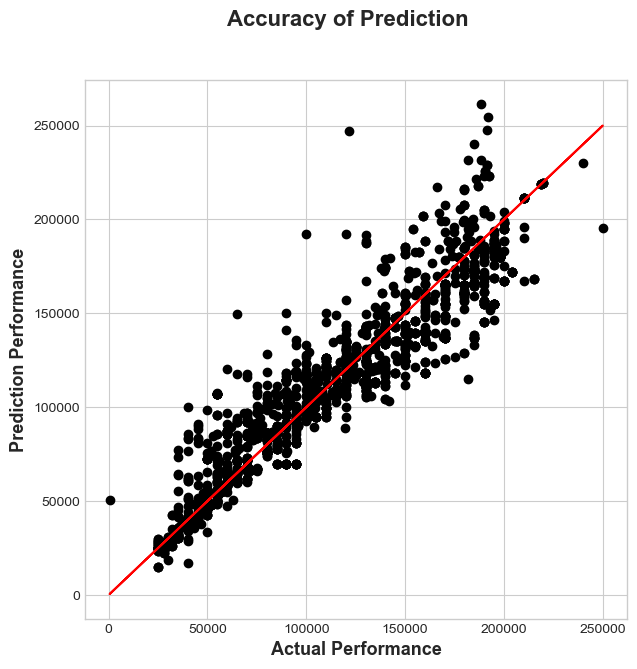

In [23]:
plt.style.use("seaborn-whitegrid")
fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(Y_test,Y_predict,c="black")
# ax.set_xlim([30,195])
# ax.set_ylim([30,180])
# ax.set(xlabel="Actual",ylabel="Predicted")
ax.plot(Y_test,Y_test,c="red")
ax.set_xlabel("Actual Performance",fontweight = "bold",fontsize=13)
ax.set_ylabel("Prediction Performance",fontweight = "bold",fontsize=13)
fig.suptitle("Accuracy of Prediction",fontweight = "bold",fontsize=16);

In [90]:
mod1

{'MAE': 2765.31, 'MSE': 41996986.22, 'Score': 0.974}

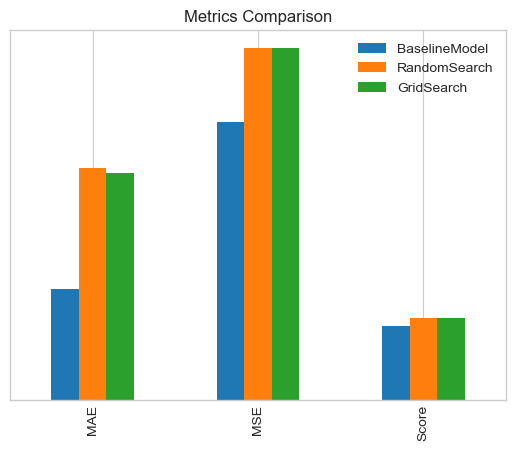

In [94]:
data = {
    "BaselineModel": {'MAE': 13.27, 'MSE': 33.11, 'Score': 8.8},
    "RandomSearch": {'MAE': 27.65, 'MSE': 41.99, 'Score': 9.74},
    "GridSearch": {'MAE': 27.11, 'MSE': 41.99, 'Score': 9.75}
}
# score scale changing but visual represntation is same

bar = pd.DataFrame(data)

# Transpose the DataFrame
# bar = bar.T

# Plot all metrics together
bar.plot(kind='bar')
plt.title('Metrics Comparison')
plt.yticks([])
plt.show()

In [24]:
import pickle

In [25]:
pickle.dump(model,open('./Trained_Model/Salary_Prediction.pkl','wb'))

In [26]:
fig.savefig('./images/SalaryModel.png')